In [47]:
import meshio as mio
import numpy as np
import matplotlib.pyplot as pl
import json
import glob

In [43]:
eps = 0.01

simj = {
    "common": "common.json",
    "patch": [
        {
            "op": "replace",
            "path": "/geometry/0/mesh",
            "value": ""
        },
        {
            "op": "replace",
            "path": "/boundary_conditions/dirichlet_boundary/0",
            "value": ""
        },
        {
            "op": "replace",
            "path": "/time/tend",
            "value": -1
        }
    ],
    "output": {
        "directory": ""
    }
}

In [45]:
for path in glob.glob("*.msh"):
    print(path)

    m = mio.read(path)
    v = m.points

    bottom = v[v[:, 1] < np.min(v[:, 1])+eps, :]
    nn = np.linalg.norm(bottom[:, [0,2]],axis=1)

    bc = bottom[nn > np.max(nn)-eps, :]

    out = np.where(np.isin(v[:, 2], bc[:, 2]))
    out = out[0]

    name = path.split(".")[0]
    dbc = name + ".txt"
    with open(dbc, "w") as f:
        for i in out:
            f.write(f"{i} 0 0 0\n")

    offset = int(name.split("-")[-1])
    tmp = simj.copy()

    tmp["patch"][0]["value"] = path
    tmp["patch"][1]["value"] = dbc
    tmp["output"]["directory"] = "../results/" + name
    tmp["patch"][2]["value"] = round((1- 0.06 - offset/10.0)*100)/100

    with open(name + ".json", "w")as jout:
        json.dump(tmp, jout)

popper5-4.msh

popper5-1.msh

popper5-5.msh

popper5-2.msh

popper5-3.msh



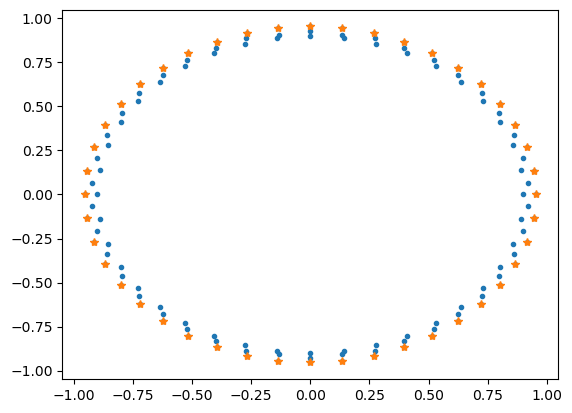

In [34]:
pl.plot(bottom[:, 0], bottom[:, 2], '.')
pl.plot(bc[:, 0], bc[:, 2], '*')

pl.show()

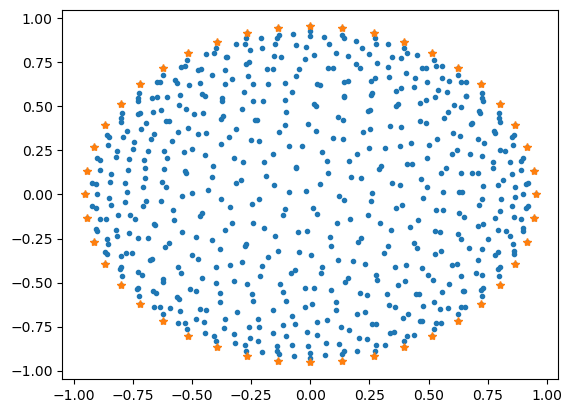

In [35]:
ax = pl.axes()

ax.plot(v[:, 0], v[:, 2], '.')
ax.plot(v[out, 0], v[out, 2], '*')

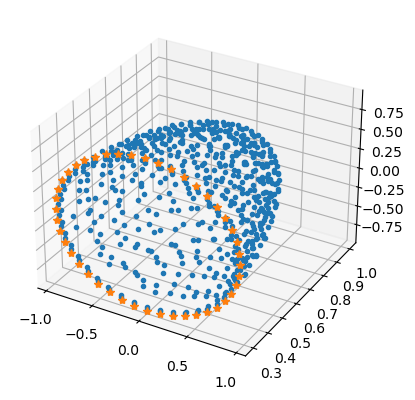

In [36]:
ax = pl.axes(projection="3d")

ax.plot(v[:, 0], v[:, 1], v[:, 2], '.')
ax.plot(v[out, 0], v[out, 1], v[out, 2], '*')

In [49]:
backj = {
    "common": "back.json",
    "patch": [
        {
            "op": "replace",
            "path": "/geometry/0/mesh",
            "value": ""
        },
    ],
    "output": {
        "directory": ""
    },
    "input": {
        "data": {
            "u_path": ""
        }
    }
}

In [52]:
for path in glob.glob("*.msh"):
    print(path)

    m = mio.read(path)
    v = m.points

    name = path.split(".")[0]

    sol = "../results/" + name + "/sol.txt"
    sol = np.loadtxt(sol)

    sol *= 0.05
    sol = sol[:v.shape[0]*3 + 12]
    sol[-12:] = 0
    np.savetxt(name + "_sol.txt", sol)


    tmp = backj.copy()

    tmp["patch"][0]["value"] = path
    tmp["output"]["directory"] = "../results/" + name + "_back"
    tmp["input"]["data"]["u_path"] = name + "_sol.txt"

    with open(name + "_back.json", "w") as jout:
        json.dump(tmp, jout)

popper5-4.msh

popper5-1.msh

popper5-5.msh

popper5-2.msh

popper5-3.msh

